# Whats PyTorch?



![alt text](https://discuss.pytorch.org/uploads/default/original/1X/b67641184e16a86f4b0eae2da95f90f9308c409b.png "Logo Title Text 1")

![alt text](https://cdn-images-1.medium.com/max/2000/1*vDnpd5RrhC9fdYgycHfpDw.png09b.png "Logo Title Text 1")


### Lets compare it with Tensorflow


### The Documentation 

- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
- https://www.tensorflow.org/api_docs/

- Both frameworks are well documented and are ready for professional use. 
- But Tensorflow wins. PyTorch limits function documentation to one page each

### The Graph


![alt text](http://donsoft.io/deep-learning-with-rnns/images/tensorflow_graph_marked.png "Logo Title Text 1")

-  In TF, we need to create Session objects and Placeholders help in running the tensors defined. 
- In PyTorch, There’s no need to create any session objects.
-  Both are based on the idea of a DAG (Directed Acyclic Graph) — but internal graph working in PyTorch is taken care when forward() function is called and it works great for RNN models, since it’s dynamic graph creation. It’s called Dynamic Computational Graph (DCG).
- With a static computation graph library like Tensorflow, once you have declaratively expressed your computation, you send it off to the GPU where it gets handled like a black box.
- With a dynamic approach, you can fully dive into every level of the computation, and see exactly what is going on.

![alt text](https://cdn-images-1.medium.com/max/1600/1*5PLIVNA5fIqEC8-kZ260KQ.gif "Logo Title Text 1")

![alt text](https://image.slidesharecdn.com/tfgdanifojoreproducingandanalyzingadaptivecomputationtimeinpytorchandtensorflow-180206151243/95/reproducing-and-analyzing-adaptive-computation-time-in-pytorch-and-tensorflow-31-638.jpg?cb=1518702763 "Logo Title Text 1")

### Visualizations

![alt text](https://www.tensorflow.org/images/mnist_tensorboard.png "Logo Title Text 1")

- Visualisation support of Graphs is offered by TF which is great (Tensorboard). 
- PyTorch?? 
- Tensorflow wins

### Debugging 

![alt text](https://cdn-images-1.medium.com/max/1600/1*oEChKKhQWKX3i32v6pBPXg.png "Logo Title Text 1")

- There’s a TF debugger called TFDBG, but it’s little off. 
- Relying on TF’s tensorboards’ viz features is best way to debug in TF.
- Since, TF’s graph model exhibits static behavior, debugging is tough in TF as compared to PyTorch.
- PyTorch wins

![alt text](https://blog.algorithmia.com/wp-content/uploads/2018/05/pytorch-10.jpg "Logo Title Text 1")

### Interoperability


![alt text](https://blog.algorithmia.com/wp-content/uploads/2018/05/pytorch-12.jpg "Logo Title Text 1")

- TF and PyTorch both support languages other than Python — CUDA, C++ and C. 
- Need to shell out additional lines of code in TensorFlow
- PyTorch is all about writing interface code among the versions of CPU and GPU. 
- Compilation is quite easy and simple, needs no references through headers which is advantageous and promotes easier way to write code.
- PyTorch Wins

In [40]:
#Lets do some PyTorch!

import torch


class TwoLayerNet(torch.nn.Module):
    def __init___(self, D_in, H, D_out):
        
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)

   	def forward(self, x):
       h_relu = self.linear(x).clamp(min=0)
       y_pred = self.linear2(h_relu)
       return y_pred

N, D_in, H, D_out = 64, 1000, 100, 10

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = TwoLayerNet(D_in, H, D_out)


loss_fn = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

for t in range(500):
    y_pred = model(x)

	loss = loss_fn(y_pred, y)
	print(t, loss_item())
	# zero gradient
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)

In [42]:
#Also some Exploratory data analysis

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def read_image(path):
    im = cv2.imread(str(path))
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def show_image(path):
    im = read_image(path)
    plt.imshow(im)

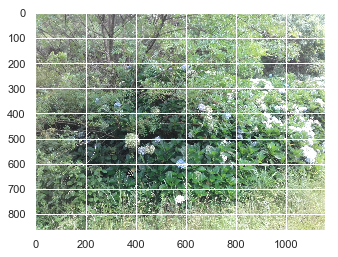

In [47]:
sample_pic = './train/300.jpg'
show_image(sample_pic)

Text(0,0.5,'count')

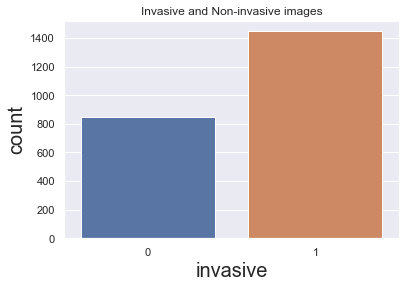

In [49]:
import pandas as pd
import seaborn as sns

labels = pd.read_csv('train_labels.csv')

sns.set(style='darkgrid')
ax = sns.countplot(x='invasive', data = labels)
plt.title('Invasive and Non-invasive images')
plt.xlabel('invasive', fontsize = 20)
plt.ylabel('count' , fontsize =20)



### ResNet

![alt text](https://cdn-images-1.medium.com/max/1600/1*h5ailwcPghw9gplG5I3-Wg.png "Logo Title Text 1")

![alt text](https://cdn-images-1.medium.com/max/1600/1*QC0ir-cgVHlOqyPzFwaTaw.png "Logo Title Text 1")

- Before ResNet, there had been several ways to deal the vanishing gradient issue
- But none worked well enough
- The core idea of ResNet is introducing a so-called “identity shortcut connection” that skips one or more layer
- The authors of argue that stacking layers shouldn’t degrade the network performance, because we could simply stack identity mappings (layer that doesn’t do anything) upon the current network, and the resulting architecture would perform the same.

![alt text](https://cdn-images-1.medium.com/max/1460/1*FWy4STsp8k0M5Yd8LifG_Q.png "Logo Title Text 1")

![alt text](https://i.stack.imgur.com/e8OtJ.png "Logo Title Text 1")

![alt text](http://srdas.github.io/DLBook/DL_images/cnn8.png "Logo Title Text 1")

![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSu6FQiD8zm0BPbbL9E2-vzYopXGUiFOnwE3pVMRqZVhDVGjuRi "Logo Title Text 1")

![alt text](https://cdn-images-1.medium.com/max/1600/1*pUyst_ciesOz_LUg0HocYg.png "Logo Title Text 1")

In [ ]:
from keras import layers


def residual_block(y, nb_channels, _strides=(1, 1), _project_shortcut=False):
    shortcut = y

    # down-sampling is performed with a stride of 2
    y = layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
    y = layers.BatchNormalization()(y)
    y = layers.LeakyReLU()(y)

    y = layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=(1, 1), padding='same')(y)
    y = layers.BatchNormalization()(y)

    # identity shortcuts used directly when the input and output are of the same dimensions
    if _project_shortcut or _strides != (1, 1):
        # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
        # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
        shortcut = layers.Conv2D(nb_channels, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    y = layers.add([shortcut, y])
    y = layers.LeakyReLU()(y)

    return y

### Instead of hoping each stack of layers directly fits a desired underlying mapping, 
### we explicitly let these layers fit a residual mapping. The original mapping 
### is recast into F(x)+x. We hypothesize that it is easier to optimize the residual 
### mapping than to optimize the original, unreferenced mapping. To the extreme, if an 
### identity mapping were optimal, it would be easier to push the residual to zero than 
### to fit an identity mapping by a stack of nonlinear layers.

In [ ]:
####PyTorch unique features
####Sample script
####EDA locally
####ResNet
####Kaggle Kernel